In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

# Корреляция

In [2]:
def sample_mean(X):
    return sum(X) / len(X)

def corr(X, Y):
    X_ = sample_mean(X)
    Y_ = sample_mean(Y)
    n = len(X)
    r = ((1 / n) * sum([(X[i] - X_) * (Y[i] - Y_) for i in range(n)])) / math.sqrt((1 / n) ** 2 * sum((X[i] - X_) ** 2 for i in range(n)) * sum((Y[i] - Y_) ** 2 for i in range(n)))
    T = math.sqrt(n) * r
    if abs(T) > 1.96:
        res = 1
    else:
        res = 0
    return res, r

# Критерий Спирмена

In [3]:
def to_serial(X):
    X_sorted = sorted(X)
    R = []
    for x in X:
        R.append(X_sorted.index(x))
    return R

def Spearman(X, Y):
    r = to_serial(X)
    s = to_serial(Y)
    n = len(X)
    S = sum((r[i] - s[i]) ** 2 for i in range(n))
    P = 1 - (6 * S) / (n ** 3 - n)
    T = math.sqrt(n - 1) * P
    if abs(T) > 1.96:
        res = 1
    else:
        res = 0
    return res, P

# Критерий Хи-квадрат

In [4]:
def to_nominal(X, Y, N):
    x_step = (max(X) - min(X)) / N
    y_step = (max(Y) - min(Y)) / N
    x = min(X)    
    n = len(X)
    nom = []
    while x < max(X):
        row = []
        y = min(Y)
        while y < max(Y):
            count = 0
            for i in range(n):
                if (X[i] >= x) & (X[i] < x + x_step) & (Y[i] >= y) & (Y[i] < y + y_step):
                    count += 1
            row.append(count)
            y += y_step        
        nom.append(row)
        x += x_step
    nom[N - 1][N - 1] += 1
    return np.array(nom)

def X_2(X, Y, N=4):
    if (N < 2) | (N > 10):
        raise Exception("N должно быть от 2 до 10")
    nominal = to_nominal(X, Y, N)
    x = [0.00393, 0.10259, 0.35185, 0.71072, 1.14548, 1.63538, 2.16735, 2.73264, 3.32511, 3.94030]
    n = len(X)
    X_2 = 0
    for i in range(N):
        for j in range(N):
            X_2 += (nominal[i][j] - np.sum(nominal[i]) * np.sum(nominal[:, j]) / n) / (np.sum(nominal[i]) * np.sum(nominal[:, j]) / n)
    
    if X_2 < 0:
        phi = 0
    else:
        phi = math.sqrt(X_2 / n)
    if X_2 > x[N - 2]:
        res = 1
    else:
        res = 0
    return res, phi

In [5]:
#X, Y = dependent_Gauss()
#X_2(X, Y)

In [6]:
10 * (4 / (4 * 8) + 4 / (6 * 8) + 2 / (6 * 2)) - 4

-0.25

# Построение графиков

In [7]:
def error_graphic(ratio_corr, ratio_Spearman, ratio_X_2, sample, label):
    fig = plt.figure(figsize=(15, 5))
    grid = plt.grid(True) 

    plt.title(label)
    plt.scatter(sample, ratio_corr, color='red')
    plt.scatter(sample, ratio_Spearman, color='blue')
    plt.scatter(sample, ratio_X_2, color='green')
    plt.plot(sample, ratio_corr, color='red')
    plt.plot(sample, ratio_Spearman, color='blue')
    plt.plot(sample, ratio_X_2, color='green')
    plt.legend(['Линия корреляции', 'Линия Спирмена', 'Линия Хи-квадрат', 'Корреляция', 'Спирмен', 'Хи-квадрат', ])

    plt.show()
    
def error_histogram(a_corr, a_Spearman, a_X_2, label):
    fig = plt.figure(figsize=(15, 5))
    grid = plt.grid(True) 

    plt.title(label)
    plt.bar(['Корреляция', 'Спирмен', 'Хи-квадрат'], [a_corr, a_Spearman, a_X_2])

    plt.show()

def koeff_graphic(koeff_corr, koeff_Spearman, koeff_X_2, sample, label):
    fig = plt.figure(figsize=(5, 5))
    grid = plt.grid(True) 
    
    plt.axis([0, 1, - 1, 1])
    
    cor = np.mean(koeff_corr)
    Sper = np.mean(koeff_Spearman)
    X2 = np.mean(koeff_X_2)

    plt.title(label)
    plt.plot(sample, [cor] * len(sample), color='red')
    plt.plot(sample, [Sper] * len(sample), color='blue')
    plt.plot(sample, [X2] * len(sample), color='green')
    plt.legend(['Линия корреляции', 'Линия Спирмена', 'Линия Хи-квадрат' ]) #, 'Корреляция', 'Спирмен', 'Хи-квадрат'

    plt.show()

# Эксперимент

In [8]:
def experiment(f, n=1000):
    sample = np.arange(n)
    a_corr = []
    a_Spearman = []
    a_X_2 = []
    koeff_corr = []
    koeff_Spearman = []
    koeff_X_2 = []
    
    for s in sample:
        X, Y = f(n=n)
        #print(corr(X, Y))
        res1, koeff1 = corr(X, Y)
        res2, koeff2 = Spearman(X, Y)
        res3, koeff3 = X_2(X, Y)
        a_corr.append(res1)
        a_Spearman.append(res2)
        a_X_2.append(res3)
        koeff_corr.append(koeff1)
        koeff_Spearman.append(koeff2)
        koeff_X_2.append(koeff3)
    
    return a_corr, a_Spearman, a_X_2, koeff_corr, koeff_Spearman, koeff_X_2, sample

# Зависимые гауссовские СВ

In [9]:
def dependent_Gauss(m=2, sigma=4, n=1000, corr=0.15):
    X = [random.gauss(m, sigma) for i in range(n)]
    Z = [random.gauss(0, sigma * 2) for i in range(n)]
    Y = [corr * X[i] + (1 - corr) * Z[i] for i in range(n)]
    return X, Y

In [10]:
a_corr, a_Spearman, a_X_2, koeff_corr, koeff_Spearman, koeff_X_2, sample = experiment(dependent_Gauss, 1000)

corr_ratio = (len(a_corr) - sum(a_corr)) / len(a_corr) 
Spearman_ratio = (len(a_Spearman) - sum(a_Spearman)) / len(a_Spearman)
X_2_ratio = (len(a_X_2) - sum(a_X_2)) / len(a_X_2)

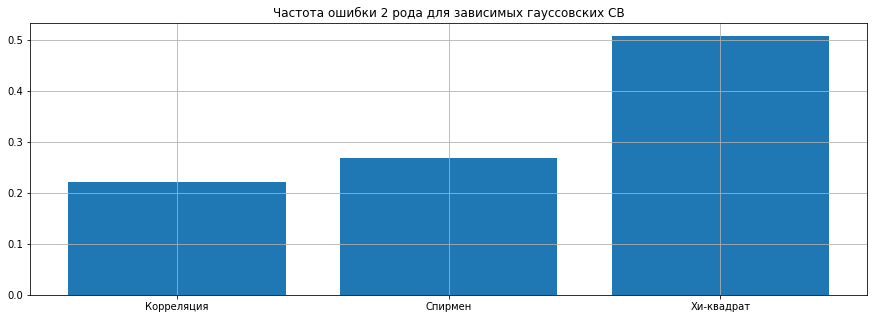

In [11]:
error_histogram(corr_ratio, Spearman_ratio, X_2_ratio, "Частота ошибки 2 рода для зависимых гауссовских СВ")

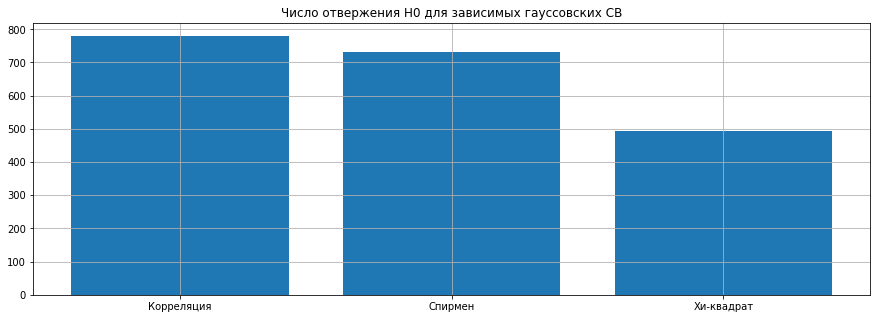

In [12]:
error_histogram(sum(a_corr), sum(a_Spearman), sum(a_X_2), "Число отвержения H0 для зависимых гауссовских СВ")

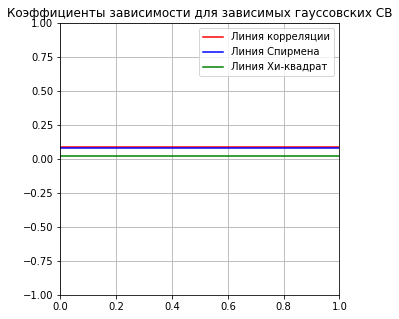

In [13]:
koeff_graphic(koeff_corr, koeff_Spearman, koeff_X_2, sample, "Коэффициенты зависимости для зависимых гауссовских СВ")

# Монотонно зависимые СВ

In [35]:
def monotonous(m=2, sigma=4, n=1000):
    X = [random.gauss(m, sigma) for i in range(n)]
    Z = [random.gauss(0, sigma * 2) for i in range(n)]
    Y = [0.007 * X[i] ** 3 + 2 * Z[i] for i in range(n)]
    return X, Y

In [36]:
a_corr, a_Spearman, a_X_2, koeff_corr, koeff_Spearman, koeff_X_2, sample = experiment(monotonous, 1000)

corr_ratio = (len(a_corr) - sum(a_corr)) / len(a_corr) 
Spearman_ratio = (len(a_Spearman) - sum(a_Spearman)) / len(a_Spearman)
X_2_ratio = (len(a_X_2) - sum(a_X_2)) / len(a_X_2)

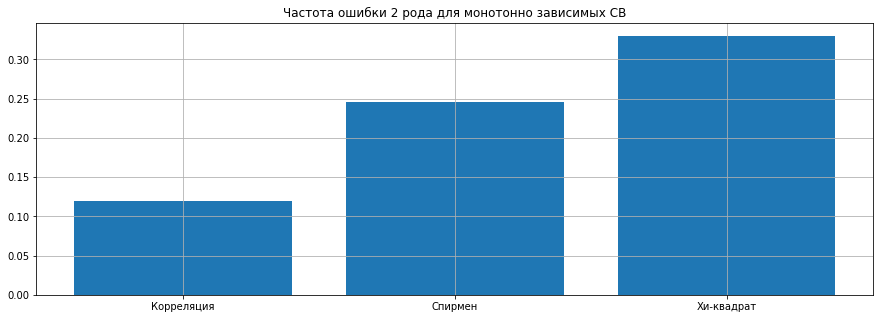

In [37]:
error_histogram(corr_ratio, Spearman_ratio, X_2_ratio, "Частота ошибки 2 рода для монотонно зависимых СВ")

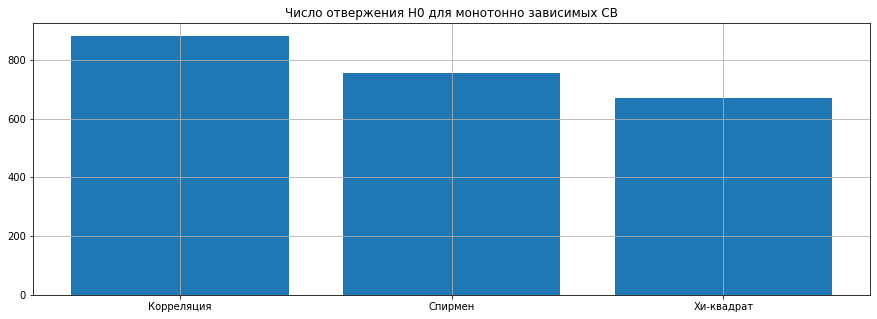

In [38]:
error_histogram(sum(a_corr), sum(a_Spearman), sum(a_X_2), "Число отвержения H0 для монотонно зависимых СВ")

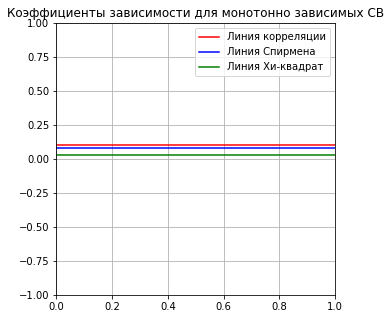

In [39]:
koeff_graphic(koeff_corr, koeff_Spearman, koeff_X_2, sample, "Коэффициенты зависимости для монотонно зависимых СВ")

# Немонотонно зависимые СВ

In [19]:
def nonmonotonic(m=2, sigma=4, n=1000):
    X = [random.gauss(m, sigma) for i in range(n)]
    Z = [random.gauss(0, sigma * 2) for i in range(n)]
    Y = [0.01 * math.sin(X[i]) + Z[i] / 6 for i in range(n)]
    return X, Y

In [20]:
a_corr, a_Spearman, a_X_2, koeff_corr, koeff_Spearman, koeff_X_2, sample = experiment(nonmonotonic, 1000)

corr_ratio = (len(a_corr) - sum(a_corr)) / len(a_corr) 
Spearman_ratio = (len(a_Spearman) - sum(a_Spearman)) / len(a_Spearman)
X_2_ratio = (len(a_X_2) - sum(a_X_2)) / len(a_X_2)

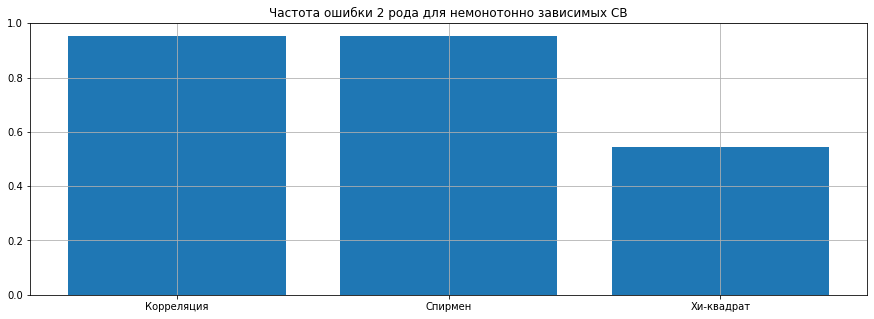

In [21]:
error_histogram(corr_ratio, Spearman_ratio, X_2_ratio, "Частота ошибки 2 рода для немонотонно зависимых СВ")

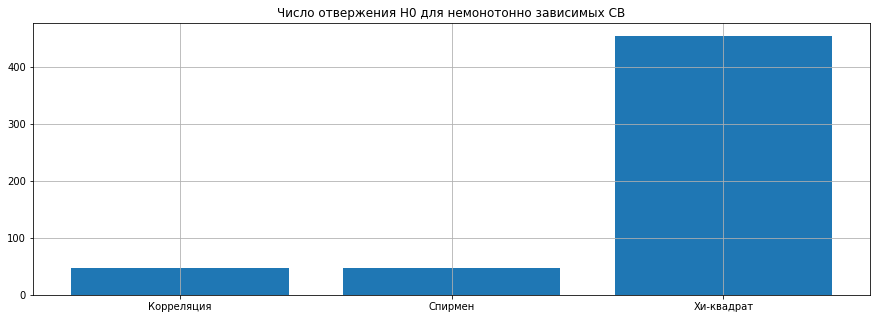

In [22]:
error_histogram(sum(a_corr), sum(a_Spearman), sum(a_X_2), "Число отвержения H0 для немонотонно зависимых СВ")

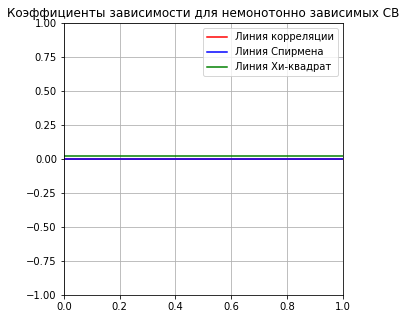

In [23]:
koeff_graphic(koeff_corr, koeff_Spearman, koeff_X_2, sample, "Коэффициенты зависимости для немонотонно зависимых СВ")